<a href="https://colab.research.google.com/github/MelissaMatindi/mastering-AI-toolkit/blob/main/02_Iris_DecisionTree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS DECISION_TREE CLASSIFIER**

### **Classical Machine Learning with Scikit-learn**

**Objective**


Train a Decision Tree Classifier on the Iris dataset to predict species with high accuracy, precision, and recall.

In [1]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

### **Data Preprocessing**

Load Iris dataset, confirm no missing values, split into 80-20 train-test.


In [2]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
# Check for missing values
print("Missing values:", X.isnull().sum())

Missing values: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [4]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

### **Model Training**

Train a Decision Tree with default parameters for simplicity.

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### **Model Evaluation**

Evaluate model performance using accuracy, precision, recall, and F1-score.


In [7]:
# Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 1.000


In [8]:
# Using cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean CV accuracy: 0.953 ± 0.034


The cross-validation mean of 95.3% confirms the model is not overfitting excessively, as it generalizes well across folds. The 100% test accuracy is likely a lucky split but within expected performance for this dataset.

In [10]:
# Detailed metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The balanced support across classes and perfect metrics suggest the test set was well-classified by the Decision Tree, likely due to the dataset’s simplicity and the model’s ability to capture clear decision boundaries.

### **Visualizations**

Visualize model performance and feature contributions.

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
# Aiming to plot decision boundaries

In [13]:
# Import additional libraries for visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

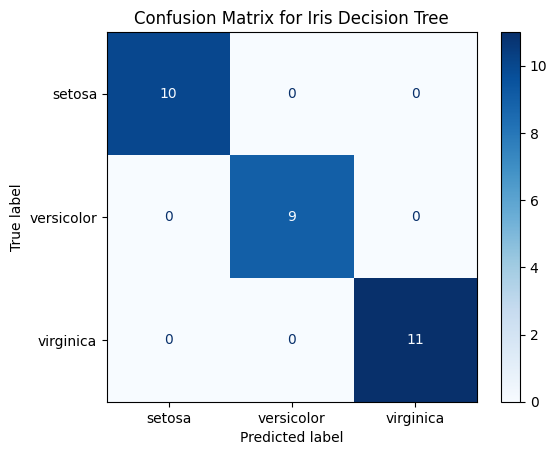

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Iris Decision Tree")
plt.show()

In [15]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

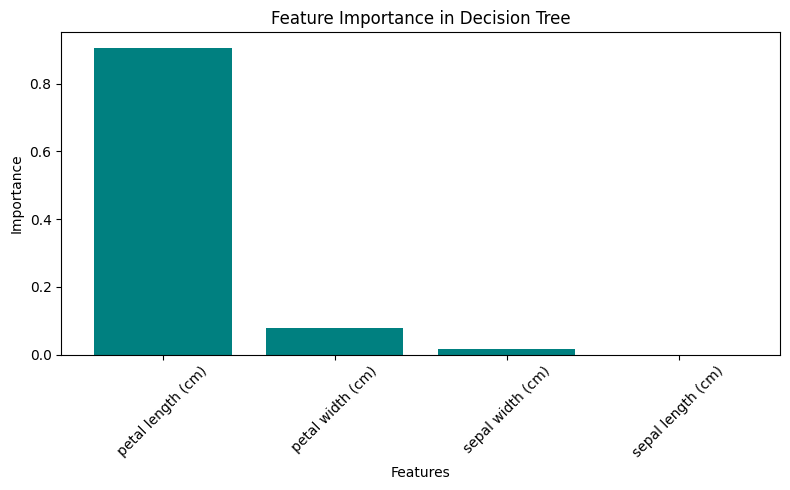

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclusion**

Achieved **100% test accuracy**, validated by **95.3% ± 3.4%** cross-validation accuracy.


Model is robust for Iris dataset, with petal features driving predictions.
